In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import ttest_ind
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv(r"marketing_sample_for_careerbuilder_uk_and_se_jobs_listing_20190801_20191231_10k_data.csv")
data.head(5)

,uniq_id,crawl_timestamp,url,job_title,category,company_name,city,state,country,post_date,...,inferred_city,inferred_state,inferred_country,fitness_score,html_job_description,has_expired,last_expiry_check_date,inferred_iso2_lang_code,inferred_iso3_lang_code,valid_through
0,f28b01f42eba6d9c85775c2c34efad76,2019-08-21 05:26:31 +0000,https://www.careerbuilder.se/jdp/hyresadminist...,Hyresadministratör till uppdrag i Göteborg!,Marketing Managers,TNG Group AB,Göteborg,Västra Götalands län,SE,2019-08-20,...,Goteborg,Vastra gotaland,Sweden,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4495251609cda1fc1536cb9188864b49,2019-09-26 05:14:47 +0000,https://www.careerbuilder.co.uk/jdp/registered...,Registered Nurse - RGN / RMN,Registered Nurses,Maria Mallaband Care Group,Gerrards Cross,Buckinghamshire,UK,2019-09-25,...,NaN,Buckinghamshire,United kingdom,10.0,<strong>Job Description</strong>\nRegistered N...,False,2019-09-26,NaN,NaN,NaN
2,666e5cef0e04e74edf4883991b08d856,2019-09-29 05:14:12 +0000,https://www.careerbuilder.co.uk/jdp/specialist...,Specialist Nurse,Clinical Nurse Specialists,Bromley Healthcare Diabetes Services,London,Greater London,UK,2019-09-28,...,London,NaN,United kingdom,10.0,<strong>Job Description</strong>\nDiabetes Spe...,False,2019-09-29,en,eng,NaN
3,22ef07533c7b0ecf9cf821c543c55130,2019-08-22 06:06:59 +0000,https://www.careerbuilder.co.uk/jdp/care-worke...,Care Worker - Wells & Shepton Mallet,Personal Care Aides,Networx,Castle Cary,Somerset,UK,2019-08-07,...,Castle cary,Somerset,United kingdom,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,63fe22598eaf48b92c5ef106a7a6685d,2019-10-09 05:16:32 +0000,https://www.careerbuilder.se/jdp/kundansvarig-...,"Kundansvarig redovisningskonsult, Karlskrona",Computer Programmers,Aspia,Karlskrona,Blekinge län,SE,2019-10-08,...,Karlskrona,Blekinge,Sweden,10.0,<strong>Job Description</strong>\n<p><strong><...,False,2019-10-09,sv,swe,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   uniq_id                       10000 non-null  object 
 1   crawl_timestamp               10000 non-null  object 
 2   url                           10000 non-null  object 
 3   job_title                     10000 non-null  object 
 4   category                      9944 non-null   object 
 5   company_name                  10000 non-null  object 
 6   city                          10000 non-null  object 
 7   state                         10000 non-null  object 
 8   country                       10000 non-null  object 
 9   post_date                     10000 non-null  object 
 10  job_description               10000 non-null  object 
 11  job_requirements              8386 non-null   object 
 12  job_type                      10000 non-null  object 
 13  jo

In [4]:
# Check for null values in the DataFrame
null_values = data.isnull()

# Count the number of null values in each column
null_count = data.isnull().sum()

# Print the count of null values in each column
null_count

uniq_id                            0
crawl_timestamp                    0
url                                0
job_title                          0
category                          56
company_name                       0
city                               0
state                              0
country                            0
post_date                          0
job_description                    0
job_requirements                1614
job_type                           0
job_board                          0
geo                                0
job_post_lang                      0
site_name                          0
domain                             0
postdate_yyyymmdd                  0
postdate_in_indexname_format       0
inferred_city                   1672
inferred_state                  1420
inferred_country                 146
fitness_score                    140
html_job_description            3043
has_expired                     3211
last_expiry_check_date          3211
i

In [5]:
# Option 1: Filling null values with a specific value
df = data.fillna(0)

In [6]:
print("\nFilled DataFrame:")
df


Filled DataFrame:


,uniq_id,crawl_timestamp,url,job_title,category,company_name,city,state,country,post_date,...,inferred_city,inferred_state,inferred_country,fitness_score,html_job_description,has_expired,last_expiry_check_date,inferred_iso2_lang_code,inferred_iso3_lang_code,valid_through
0,f28b01f42eba6d9c85775c2c34efad76,2019-08-21 05:26:31 +0000,https://www.careerbuilder.se/jdp/hyresadminist...,Hyresadministratör till uppdrag i Göteborg!,Marketing Managers,TNG Group AB,Göteborg,Västra Götalands län,SE,2019-08-20,...,Goteborg,Vastra gotaland,Sweden,10.0,0,0,0,0,0,0
1,4495251609cda1fc1536cb9188864b49,2019-09-26 05:14:47 +0000,https://www.careerbuilder.co.uk/jdp/registered...,Registered Nurse - RGN / RMN,Registered Nurses,Maria Mallaband Care Group,Gerrards Cross,Buckinghamshire,UK,2019-09-25,...,0,Buckinghamshire,United kingdom,10.0,<strong>Job Description</strong>\nRegistered N...,False,2019-09-26,0,0,0
2,666e5cef0e04e74edf4883991b08d856,2019-09-29 05:14:12 +0000,https://www.careerbuilder.co.uk/jdp/specialist...,Specialist Nurse,Clinical Nurse Specialists,Bromley Healthcare Diabetes Services,London,Greater London,UK,2019-09-28,...,London,0,United kingdom,10.0,<strong>Job Description</strong>\nDiabetes Spe...,False,2019-09-29,en,eng,0
3,22ef07533c7b0ecf9cf821c543c55130,2019-08-22 06:06:59 +0000,https://www.careerbuilder.co.uk/jdp/care-worke...,Care Worker - Wells & Shepton Mallet,Personal Care Aides,Networx,Castle Cary,Somerset,UK,2019-08-07,...,Castle cary,Somerset,United kingdom,10.0,0,0,0,0,0,0
4,63fe22598eaf48b92c5ef106a7a6685d,2019-10-09 05:16:32 +0000,https://www.careerbuilder.se/jdp/kundansvarig-...,"Kundansvarig redovisningskonsult, Karlskrona",Computer Programmers,Aspia,Karlskrona,Blekinge län,SE,2019-10-08,...,Karlskrona,Blekinge,Sweden,10.0,<strong>Job Description</strong>\n<p><strong><...,False,2019-10-09,sv,swe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7bae029ae250e8f136c83948e0231689,2019-10-15 05:38:32 +0000,https://www.careerbuilder.co.uk/jdp/head-chef-...,Head Chef,Chefs and Head Cooks,The Cinnamon Care Collection,Kenley,Surrey,UK,2019-10-14,...,0,0,0,0.0,\n\n<strong>Job Description</strong>\n<p><stro...,False,2019-10-15,en,eng,2019-11-13T23:59:59Z
9996,b93e48dd2b862ebc241fcee8baf1ce03,2019-10-19 05:41:19 +0000,https://www.careerbuilder.co.uk/jdp/staff-nurs...,Staff Nurse,Registered Nurses,Recruitment Panda,Launceston,Cornwall,UK,2019-10-18,...,Launceston,Cornwall,United kingdom,10.0,<strong>Job Description</strong>\n<p>“<em>A ne...,False,2019-10-19,en,eng,2019-11-17T23:59:59Z
9997,b3028aa3b624fe537d9e8b165225f4a5,2019-10-23 05:45:32 +0000,https://www.careerbuilder.co.uk/jdp/unit-manag...,Unit Manager,Medical and Health Services Managers,WR Health & Social Care,Stonehaven,Aberdeenshire,UK,2019-10-22,...,0,Aberdeenshire,United kingdom,10.0,<strong>Job Description</strong>\n<p><strong>U...,False,2019-10-23,en,eng,2019-11-21T23:59:59Z
9998,4ae0ed48d08677e6f7cb5003e18735f6,2019-10-03 05:42:27 +0000,https://www.careerbuilder.co.uk/jdp/commercial...,Commercial Operations Executive - Sales Function,General and Operations Managers,Croud,London,Greater London,UK,2019-10-02,...,London,0,United kingdom,10.0,<strong>Job Description</strong>\n<p><strong>J...,False,2019-10-03,en,eng,0


In [7]:
# Check for null values in the DataFrame
null_values = df.isnull()

# Count the number of null values in each column
null_count = df.isnull().sum()

# Print the count of null values in each column
null_count

uniq_id                         0
crawl_timestamp                 0
url                             0
job_title                       0
category                        0
company_name                    0
city                            0
state                           0
country                         0
post_date                       0
job_description                 0
job_requirements                0
job_type                        0
job_board                       0
geo                             0
job_post_lang                   0
site_name                       0
domain                          0
postdate_yyyymmdd               0
postdate_in_indexname_format    0
inferred_city                   0
inferred_state                  0
inferred_country                0
fitness_score                   0
html_job_description            0
has_expired                     0
last_expiry_check_date          0
inferred_iso2_lang_code         0
inferred_iso3_lang_code         0
valid_through 

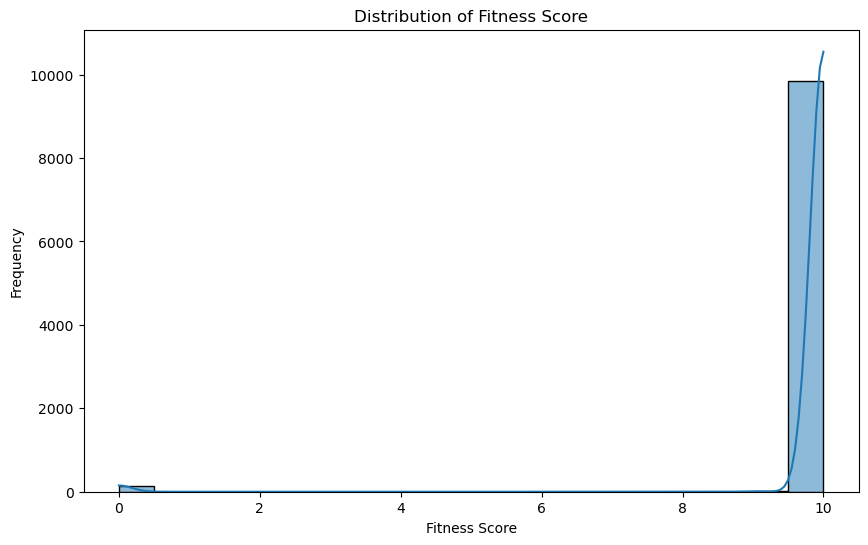

In [8]:
# Explore the distribution of a specific column (e.g., fitness_score)
plt.figure(figsize=(10, 6))
sns.histplot(df['fitness_score'].dropna(), kde=True, bins=20)
plt.title('Distribution of Fitness Score')
plt.xlabel('Fitness Score')
plt.ylabel('Frequency')
plt.show()

C:\Users\Tanmayee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


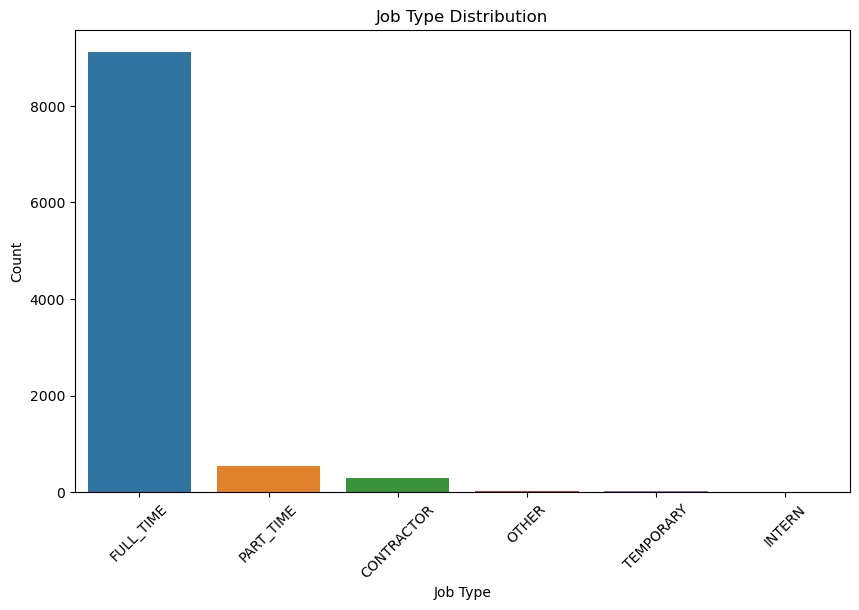

In [9]:
# Explore the distribution of categorical columns (e.g., job_type)
plt.figure(figsize=(10, 6))
sns.countplot(df['job_type'].dropna())
plt.title('Job Type Distribution')
plt.xticks(rotation=45)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

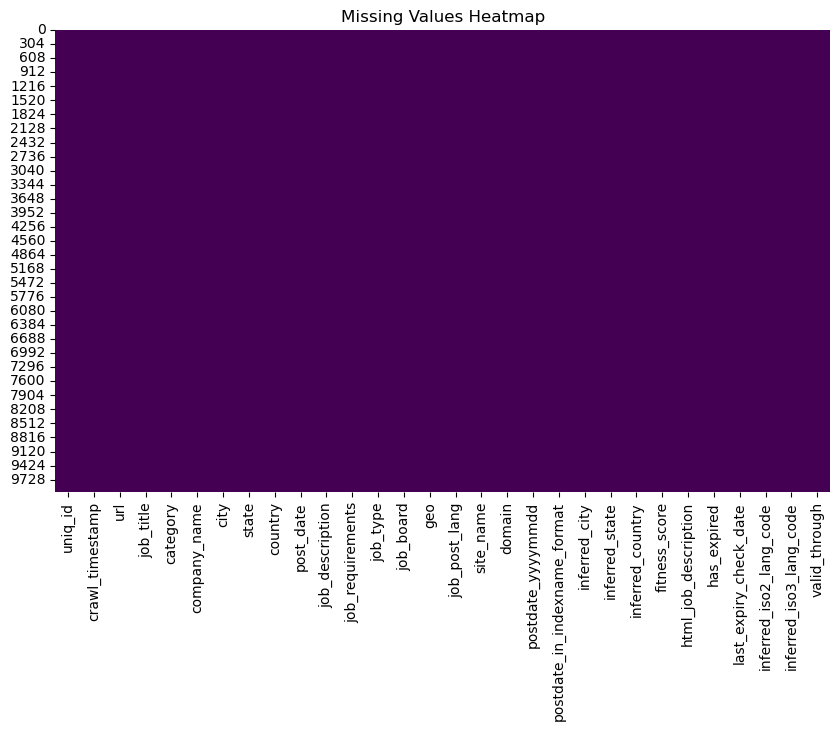

In [10]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   uniq_id                       10000 non-null  object 
 1   crawl_timestamp               10000 non-null  object 
 2   url                           10000 non-null  object 
 3   job_title                     10000 non-null  object 
 4   category                      10000 non-null  object 
 5   company_name                  10000 non-null  object 
 6   city                          10000 non-null  object 
 7   state                         10000 non-null  object 
 8   country                       10000 non-null  object 
 9   post_date                     10000 non-null  object 
 10  job_description               10000 non-null  object 
 11  job_requirements              10000 non-null  object 
 12  job_type                      10000 non-null  object 
 13  jo

In [13]:
# Analyze job categories
category_counts = df['category'].value_counts()
print(category_counts)

# Analyze job types
job_type_counts = df['job_type'].value_counts()
print(job_type_counts)

# Visualize job postings over time
df['post_date'] = pd.to_datetime(df['post_date'])
df['year'] = df['post_date'].dt.year
df['month'] = df['post_date'].dt.month

Registered Nurses                                                  2796
Personal Care Aides                                                 561
Social and Human Service Assistants                                 453
Home Health Aides                                                   422
Medical and Health Services Managers                                270
                                                                   ... 
Administrative Law Judges, Adjudicators, and Hearing Officers         1
Epidemiologists                                                       1
Self-Enrichment Education Teachers                                    1
Counter Attendants, Cafeteria, Food Concession, and Coffee Shop       1
Bartenders                                                            1
Name: category, Length: 310, dtype: int64
FULL_TIME     9114
PART_TIME      550
CONTRACTOR     295
OTHER           21
TEMPORARY       18
INTERN           2
Name: job_type, dtype: int64


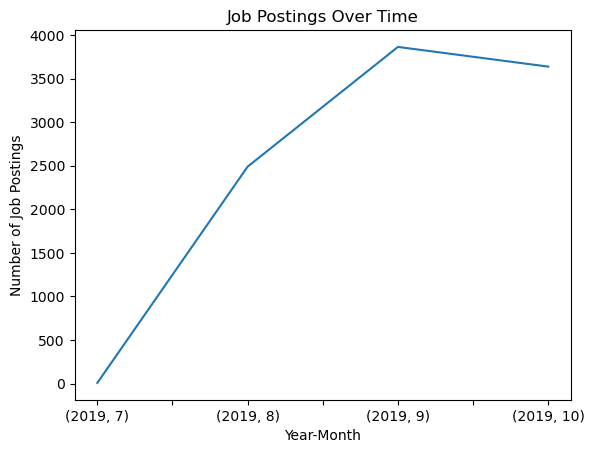

In [14]:
job_posting_trend = df.groupby(['year', 'month'])['job_title'].count()
job_posting_trend.plot()
plt.xlabel('Year-Month')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings Over Time')
plt.show()

In [15]:
# Analyze job postings by city
city_counts = df['city'].value_counts()
print(city_counts)

# Analyze job postings by state
state_counts = df['state'].value_counts()
print(state_counts)

# Analyze job postings by country
country_counts = df['country'].value_counts()
print(country_counts)

London             1054
Stockholm           403
Manchester          183
Bristol             160
Birmingham          147
                   ... 
Welling               1
Newport Pagnell       1
Windlesham            1
Syston                1
Kenley                1
Name: city, Length: 1159, dtype: int64
Greater London         1405
Stockholms län          485
Hampshire               333
Greater Manchester      326
Kent                    301
                       ... 
Isle of Man               1
East Dunbartonshire       1
County Dublin             1
East Renfrewshire         1
Na h-Eileanan Siar        1
Name: state, Length: 116, dtype: int64
UK    8947
SE    1052
IE       1
Name: country, dtype: int64


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tanmayee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tanmayee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Keyword  Count
0     care  35690
1      job  21315
3      och  21314
8     work  21274
5  service  19549
4   please  18547
7     team  18543
9  working  16730
6  support  15982
2      nhs  15344


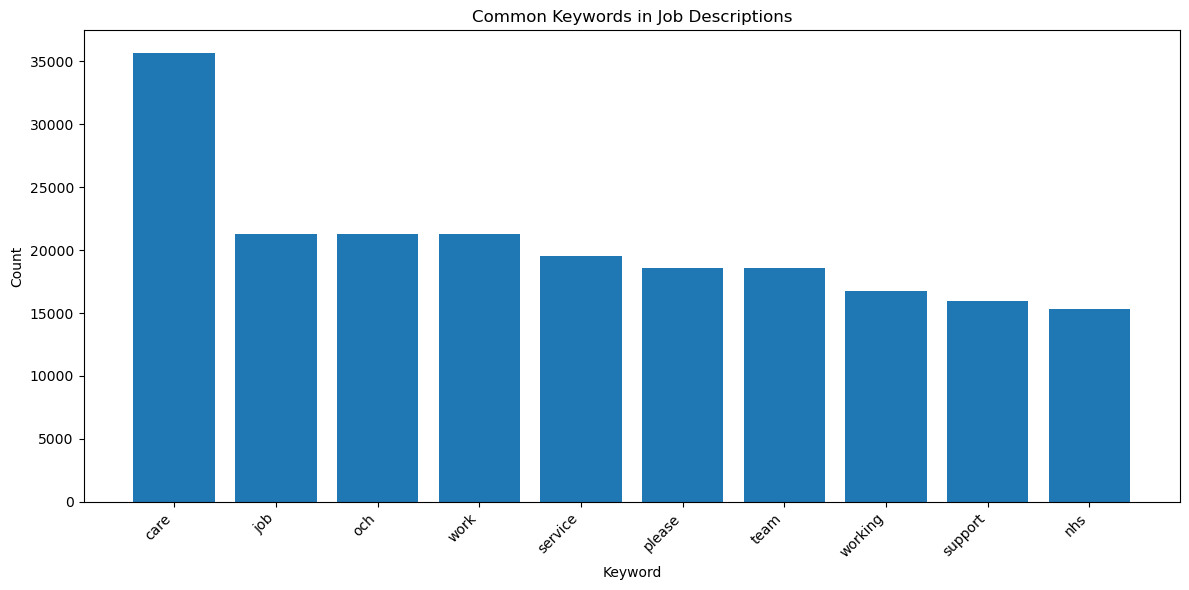

In [16]:
# Select the job description column
job_descriptions = df['job_description']

# Tokenize and preprocess the job descriptions
nltk.download('punkt')
nltk.download('stopwords')

# Define a list of common stopwords to remove
stop_words = set(stopwords.words('english'))

# Initialize the CountVectorizer with custom preprocessing
vectorizer = CountVectorizer(
    stop_words=stop_words,  # Remove common stopwords
    token_pattern=r'\b\w+\b',  # Use word boundaries to capture individual words
    max_features=10,  # Set the maximum number of features (common keywords)
)

# Fit and transform the job descriptions to create a document-term matrix
X = vectorizer.fit_transform(job_descriptions)

# Get the vocabulary of keywords
keywords = vectorizer.get_feature_names_out()

# Sum the counts of each keyword across all job descriptions
keyword_counts = X.sum(axis=0).A1

# Create a DataFrame to store keyword counts
keywords_df = pd.DataFrame({'Keyword': keywords, 'Count': keyword_counts})

# Sort the keywords by count in descending order
keywords_df = keywords_df.sort_values(by='Count', ascending=False)

# Display the most common keywords
print(keywords_df)

# Visualize the common keywords
plt.figure(figsize=(12, 6))
plt.bar(keywords_df['Keyword'], keywords_df['Count'])
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Common Keywords in Job Descriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

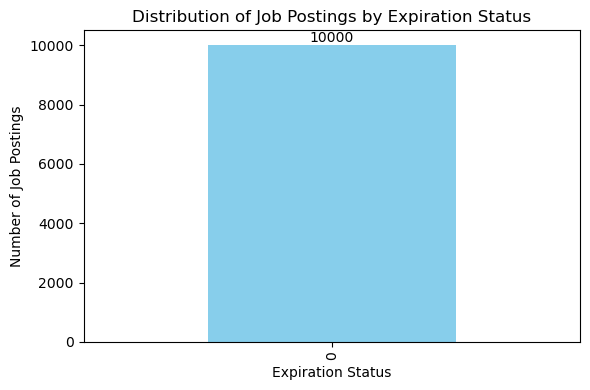

In [17]:
# Group the data by expiration status (e.g., 'has_expired')
expiration_counts = df['has_expired'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(6, 4))
expiration_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Postings by Expiration Status')
plt.xlabel('Expiration Status')
plt.ylabel('Number of Job Postings')

# Display the count values on top of the bars
for i, count in enumerate(expiration_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

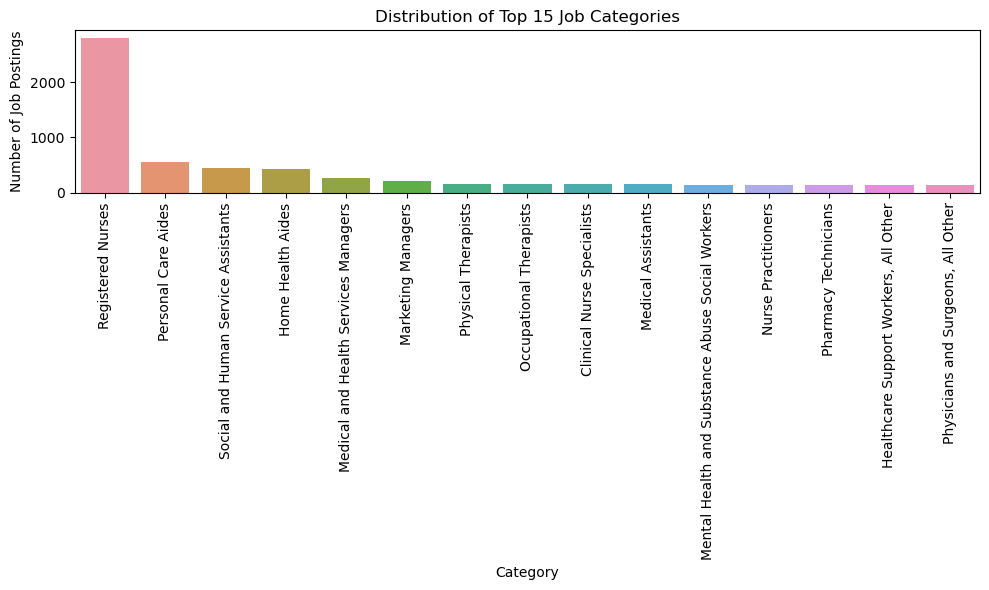

In [18]:
# Create a bar chart to visualize the distribution of the top 15 job categories
top_categories = data['category'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='category', order=top_categories.index)
plt.title('Distribution of Top 15 Job Categories')
plt.xlabel('Category')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

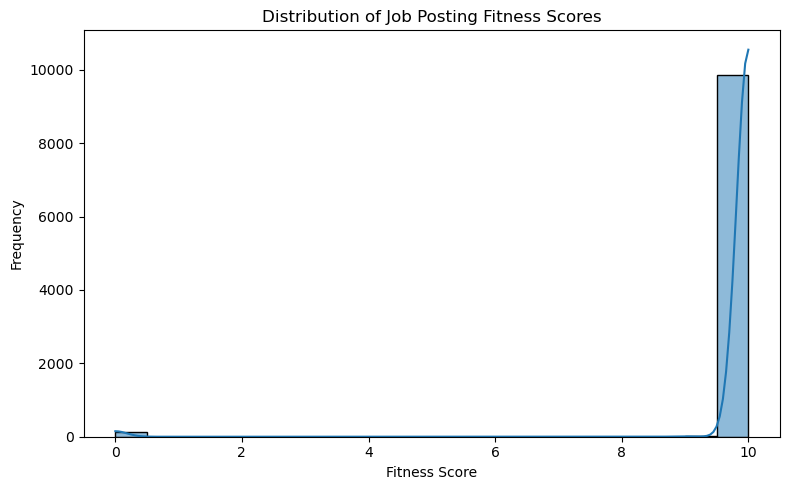

In [19]:
# Create a histogram to visualize the distribution of job posting fitness scores
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='fitness_score', bins=20, kde=True)
plt.title('Distribution of Job Posting Fitness Scores')
plt.xlabel('Fitness Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

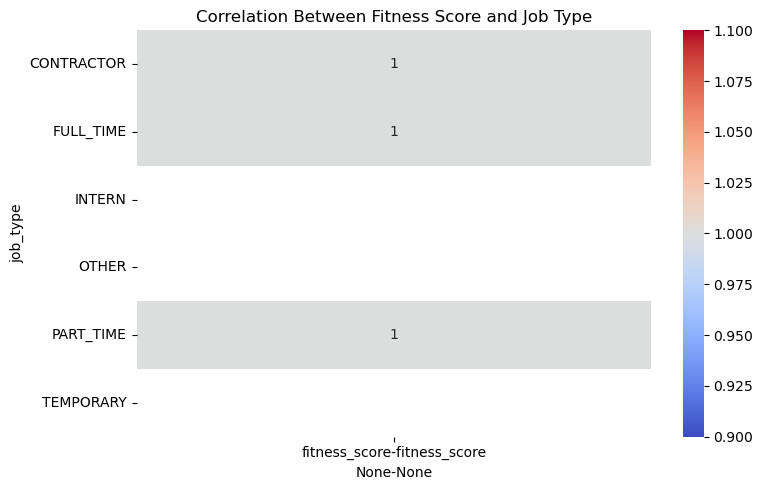

In [20]:
# Create a heatmap to visualize the correlation between fitness score and job type
correlation_matrix = df[['fitness_score', 'job_type']].groupby('job_type').corr().unstack()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Fitness Score and Job Type')
plt.tight_layout()
plt.show()

In [21]:
# Separate data into two groups based on expiration status
expired_jobs = df[df['has_expired'] == 'Yes']['fitness_score']
non_expired_jobs = df[df['has_expired'] == 'No']['fitness_score']

# Perform a t-test to compare the two groups
t_stat, p_value = ttest_ind(expired_jobs, non_expired_jobs, equal_var=False)

# Display the results
alpha = 0.05  # Set the significance level
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Check if the result is statistically significant
if p_value < alpha:
    print('The difference in fitness scores is statistically significant.')
else:
    print('There is no statistically significant difference in fitness scores.')

T-Statistic: nan
P-Value: nan
There is no statistically significant difference in fitness scores.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   uniq_id                       10000 non-null  object        
 1   crawl_timestamp               10000 non-null  object        
 2   url                           10000 non-null  object        
 3   job_title                     10000 non-null  object        
 4   category                      10000 non-null  object        
 5   company_name                  10000 non-null  object        
 6   city                          10000 non-null  object        
 7   state                         10000 non-null  object        
 8   country                       10000 non-null  object        
 9   post_date                     10000 non-null  datetime64[ns]
 10  job_description               10000 non-null  object        
 11  job_requirements             

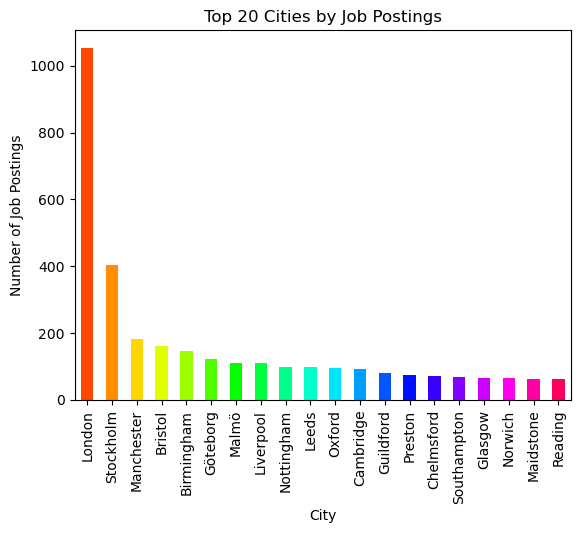

In [23]:
# 1. Job Market Trends by City
city_counts = df['city'].value_counts()
top_20_cities = city_counts.head(20)

# Create a list of distinct colors for each city
colors = sns.color_palette("hsv", len(top_20_cities))

# Plot the top 20 cities with different colors
top_20_cities.plot(kind='bar', title='Top 20 Cities by Job Postings')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)

# Apply different colors to each bar
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i])

plt.show()

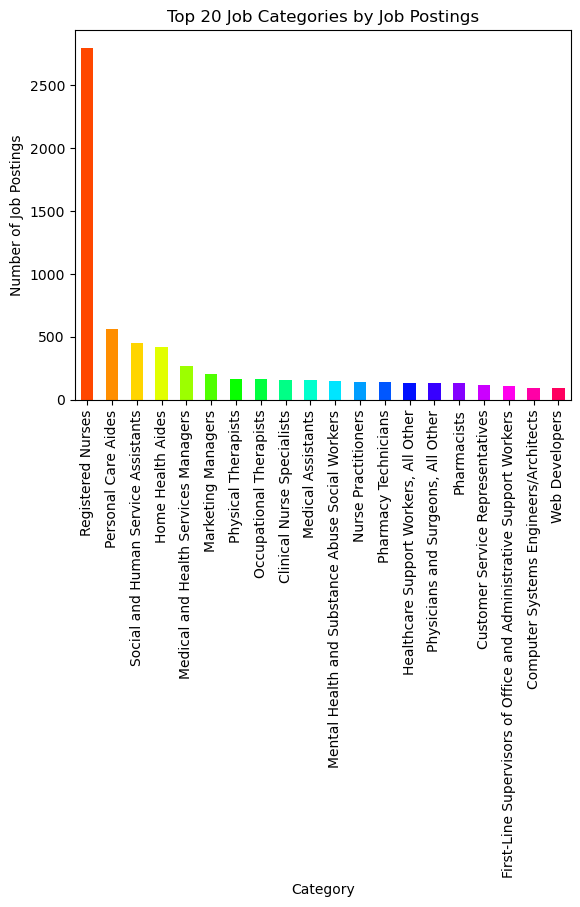

In [24]:
# 2. Job Market Trends by Category
category_counts = df['category'].value_counts()
top_20_categories = category_counts.head(20)

# Create a list of distinct colors for each category
colors = sns.color_palette("hsv", len(top_20_categories))

# Plot the top 20 categories with different colors
top_20_categories.plot(kind='bar', title='Top 20 Job Categories by Job Postings')
plt.xlabel('Category')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)

# Apply different colors to each bar
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i])

plt.show()

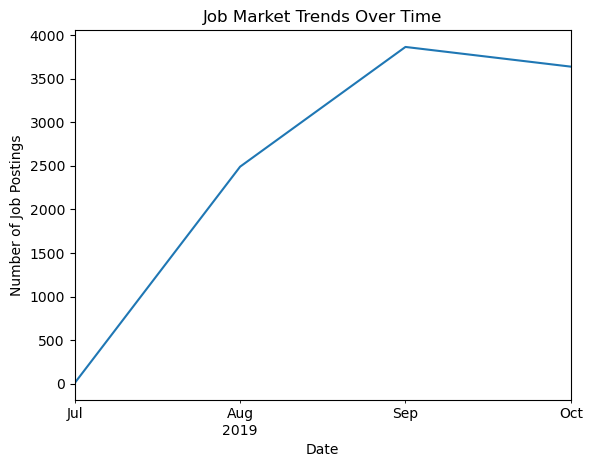

In [25]:
# 3. Job Market Trends Over Time
# Assuming there's a 'post_date' column
df['post_date'] = pd.to_datetime(df['post_date'])
df.set_index('post_date', inplace=True)
job_trends_over_time = df['job_title'].resample('M').count()
job_trends_over_time.plot(title='Job Market Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.show()

In [27]:
# Feature selection
features = ['month', 'category', 'city','job_title','company_name','domain','country','state']  # Select relevant features
X = pd.get_dummies(df[features])  # Perform one-hot encoding for categorical variables

df['target'] = df['job_requirements'].apply(lambda x: len(str(x)))

y = df['target']  # Now 'y' contains numeric data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [28]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_lr:.2f}')  # Display with 2 decimal places

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae_lr:.2f}')  # Display with 2 decimal places

# Calculate Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse_lr:.2f}')  # Display with 2 decimal places

Mean Squared Error: 63654574183266044274947391488.00
Mean Absolute Error (MAE): 54723510509427.80
Root Mean Squared Error (RMSE): 252298581413503.09


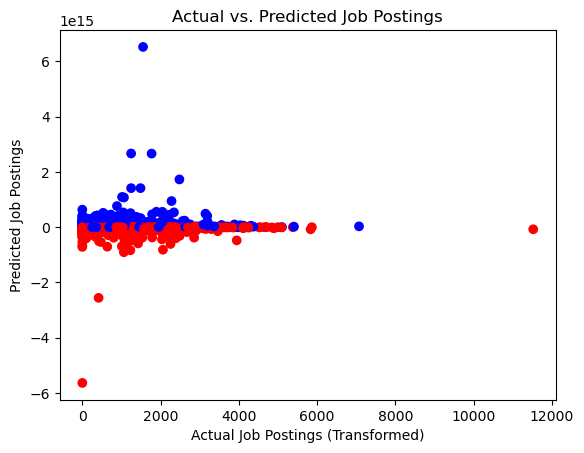

In [29]:
# Visualize predictions with different colors
plt.scatter(y_test, y_pred, c=['blue' if a < b else 'red' for a, b in zip(y_test, y_pred)])
plt.xlabel("Actual Job Postings (Transformed)")
plt.ylabel("Predicted Job Postings")
plt.title("Actual vs. Predicted Job Postings")
plt.show()

# Decision Tree

In [30]:
# Train a Decision Tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse_dc = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_dc:.2f}')  # Display with 2 decimal places

# Calculate Mean Absolute Error (MAE)
mae_dc = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae_dc:.2f}')  # Display with 2 decimal places

# Calculate Root Mean Squared Error (RMSE)
rmse_dc = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse_dc:.2f}')  # Display with 2 decimal places

Mean Squared Error: 875712.81
Mean Absolute Error (MAE): 597.37
Root Mean Squared Error (RMSE): 935.80


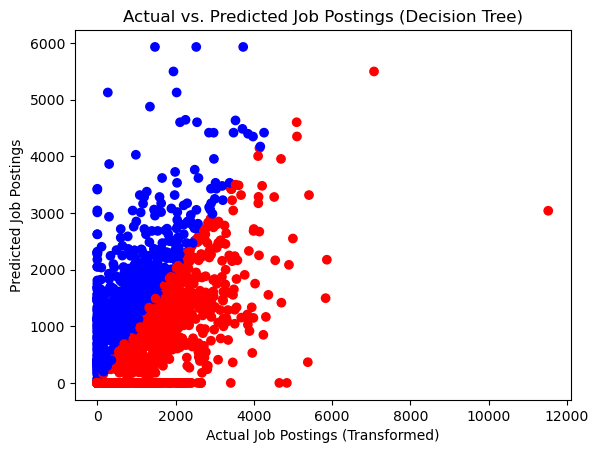

In [31]:
# Visualize predictions with different colors
plt.scatter(y_test, y_pred, c=['blue' if a < b else 'red' for a, b in zip(y_test, y_pred)])
plt.xlabel("Actual Job Postings (Transformed)")
plt.ylabel("Predicted Job Postings")
plt.title("Actual vs. Predicted Job Postings (Decision Tree)")
plt.show()

# Lasso Regression

In [33]:
# Train a Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso:.2f}')  # Display with 2 decimal places

# Calculate Mean Absolute Error (MAE)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error (MAE) (Lasso): {mae_lasso:.2f}')  # Display with 2 decimal places

# Calculate Root Mean Squared Error (RMSE)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f'Root Mean Squared Error (RMSE) (Lasso): {rmse_lasso:.2f}')  # Display with 2 decimal places

Mean Squared Error (Lasso): 738303.26
Mean Absolute Error (MAE) (Lasso): 631.11
Root Mean Squared Error (RMSE) (Lasso): 859.25


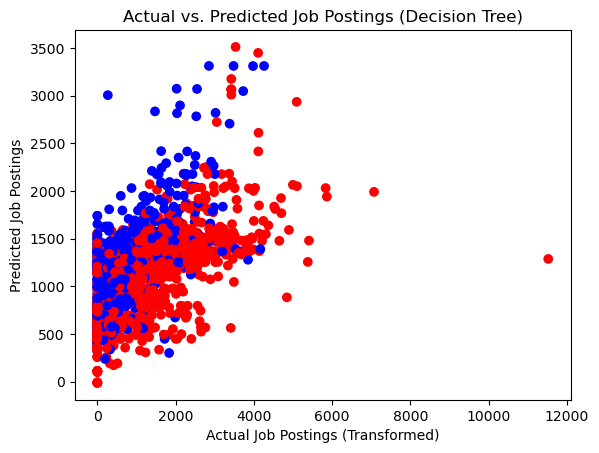

In [34]:
# Visualize predictions with different colors
plt.scatter(y_test, y_pred_lasso, c=['blue' if a < b else 'red' for a, b in zip(y_test, y_pred)])
plt.xlabel("Actual Job Postings (Transformed)")
plt.ylabel("Predicted Job Postings")
plt.title("Actual vs. Predicted Job Postings (Decision Tree)")
plt.show()

# Ridge Regression

In [35]:
# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge:.2f}')  # Display with 2 decimal places

# Calculate Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error (MAE) (Ridge): {mae_ridge:.2f}')  # Display with 2 decimal places

# Calculate Root Mean Squared Error (RMSE)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Root Mean Squared Error (RMSE) (Ridge): {rmse_ridge:.2f}')  # Display with 2 decimal places

Mean Squared Error (Ridge): 615344.45
Mean Absolute Error (MAE) (Ridge): 550.43
Root Mean Squared Error (RMSE) (Ridge): 784.44


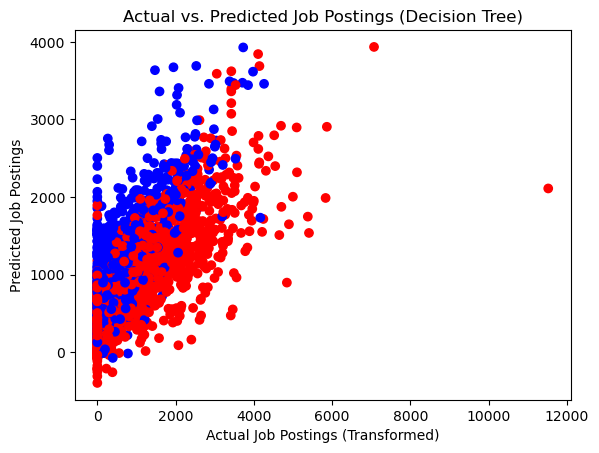

In [36]:
# Visualize predictions with different colors
plt.scatter(y_test, y_pred_ridge, c=['blue' if a < b else 'red' for a, b in zip(y_test, y_pred)])
plt.xlabel("Actual Job Postings (Transformed)")
plt.ylabel("Predicted Job Postings")
plt.title("Actual vs. Predicted Job Postings (Decision Tree)")
plt.show()

# ElasticNet

In [37]:
# Create an Elastic Net model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio as needed

# Train the Elastic Net model
elastic_net_model.fit(X_train, y_train)

# Make predictions
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluate the Elastic Net model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print(f'Mean Squared Error (Elastic Net): {mse_elastic_net:.2f}')  # Display with 2 decimal places

# Calculate Mean Absolute Error (MAE)
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
print(f'Mean Absolute Error (MAE) (Elastic Net): {mae_elastic_net:.2f}')  # Display with 2 decimal places

# Calculate Root Mean Squared Error (RMSE)
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))
print(f'Root Mean Squared Error (RMSE) (Elastic Net): {rmse_elastic_net:.2f}')  # Display with 2 decimal places

Mean Squared Error (Elastic Net): 991562.83
Mean Absolute Error (MAE) (Elastic Net): 755.48
Root Mean Squared Error (RMSE) (Elastic Net): 995.77


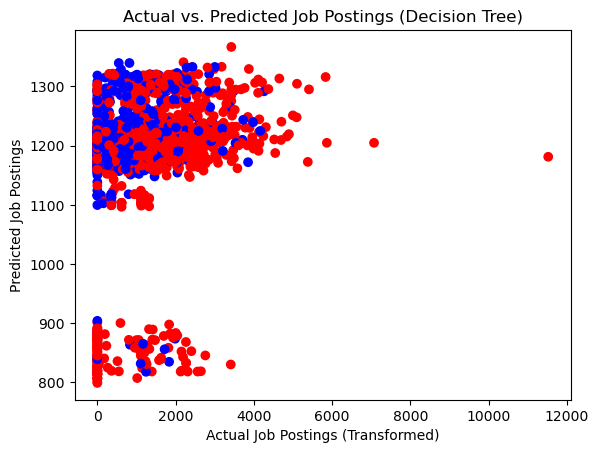

In [38]:
# Visualize predictions with different colors
plt.scatter(y_test, y_pred_elastic_net, c=['blue' if a < b else 'red' for a, b in zip(y_test, y_pred)])
plt.xlabel("Actual Job Postings (Transformed)")
plt.ylabel("Predicted Job Postings")
plt.title("Actual vs. Predicted Job Postings (Decision Tree)")
plt.show()

In [39]:
# Create a dictionary with the evaluation metrics for each model
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Lasso', 'Ridge', 'Elastic Net'],
    'MSE': [mse_lr, mse_dc, mse_lasso, mse_ridge, mse_elastic_net],
    'MAE': [mae_lr, mae_dc, mae_lasso, mae_ridge, mae_elastic_net],
    'RMSE': [rmse_lr, rmse_dc, rmse_lasso, rmse_ridge, rmse_elastic_net]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the table
print(df)

               Model           MSE           MAE          RMSE
0  Linear Regression  6.365457e+28  5.472351e+13  2.522986e+14
1      Decision Tree  8.757128e+05  5.973658e+02  9.357953e+02
2              Lasso  7.383033e+05  6.311050e+02  8.592457e+02
3              Ridge  6.153444e+05  5.504285e+02  7.844389e+02
4        Elastic Net  9.915628e+05  7.554766e+02  9.957725e+02


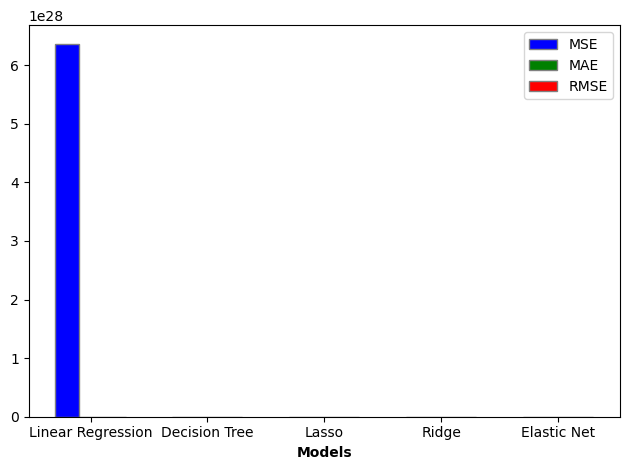

In [40]:
# Data
models = ['Linear Regression', 'Decision Tree', 'Lasso', 'Ridge', 'Elastic Net']
mse = [mse_lr, mse_dc, mse_lasso, mse_ridge, mse_elastic_net]
mae = [mae_lr, mae_dc, mae_lasso, mae_ridge, mae_elastic_net]
rmse = [rmse_lr, rmse_dc, rmse_lasso, rmse_ridge, rmse_elastic_net]

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plots
plt.bar(r1, mse, color='b', width=bar_width, edgecolor='grey', label='MSE')
plt.bar(r2, mae, color='g', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r3, rmse, color='r', width=bar_width, edgecolor='grey', label='RMSE')

# Set the x-axis labels
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()